<a href="https://colab.research.google.com/github/joungminhee/study/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC%20%EC%8B%A4%EA%B8%B01%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1유형

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/bank/train.csv')

In [2]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no


마케팅 응답 고객들의 나이를 10살 단위로 변환 했을 때, 가장 많은 인원을 가진 나이대는? 

(0 - 9: 0,

10 - 19 = 10)

In [3]:
df['age10'] = df['age']//10 * 10

In [4]:
df['age10'].value_counts().index[0]

30

마케팅 응답 고객들의 나이를 10살 단위로 변환 했을 때, 가장 많은 나이대 구간의 인원은 몇명인가?

In [5]:
df['age10'].value_counts().values[0]

5056

나이가 25살 이상 29살 미만인 응답 고객들중 housing컬럼의 값이 yes인 고객의 수는?

In [6]:
df1 = df[(df['age'] >= 25) & (df['age'] < 29)]

In [7]:
df1[df1['housing']=='yes'].shape[0]

504

numeric한 값을 가지지 않은 컬럼들중 unique한 값을 가장 많이 가지는 컬럼은?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
 17  age10      12870 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 1.8+ MB


In [9]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,12870,12870,12870,12870,12870,12870,12870,12870,12870,12870
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,2858,7490,6368,12662,6605,11060,8756,3594,10070,8903


In [10]:
df['job'].unique()

array(['technician', 'services', 'management', 'admin.', 'student',
       'blue-collar', 'housemaid', 'retired', 'unemployed',
       'self-employed', 'unknown', 'entrepreneur'], dtype=object)

balance 컬럼값들의 평균값 이상을 가지는 데이터를 ID값을 기준으로 내림차순 정렬했을때 상위 100개 데이터의 balance값의 평균은?

In [11]:
df1 = df[df.balance >= df.balance.mean()].sort_values('ID', ascending=False).head(100)

In [12]:
df1.balance.mean()

3473.73

가장 많은 광고를 집행했던 날짜는 언제인가? (데이터 그대로 일(숫자),달(영문)으로 표기)

In [13]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,age10
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no,20
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no,20
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no,30
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no,40
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no,20


In [14]:
df[['day','month']].value_counts().index[0]

(15, 'may')

데이터의 job이 unknown 상태인 고객들의 age 컬럼 값의 정규성을 검정하고자 한다. 샤피로 검정의 p-value값을 구하여라

In [15]:
df[df.job == 'unknown']['age']

25       52
86       55
135      46
237      54
409      45
         ..
12250    48
12615    58
12675    57
12689    38
12866    31
Name: age, Length: 80, dtype: int64

In [16]:
from scipy.stats import shapiro
result = shapiro(df[df.job == 'unknown']['age'])[1]
result
# 샤피로검정 from scipy.stats import shapiro

0.1961131989955902

age와 balance의 상관계수를 구하여라

In [17]:
df[['age','balance']].corr().iloc[0,1]
# 상관계수 함수 = corr()

0.10198734763981462

y 변수와 education 변수는 독립인지 카이제곱검정을 통해 확인하려한다. p-value값을 출력하라

In [18]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,age10
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no,20
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no,20
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no,30
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no,40
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes,40
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes,30
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no,30
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no,40


In [19]:
v = pd.crosstab(df.y,df.education)

In [20]:
v

education,primary,secondary,tertiary,unknown
y,,,,
no,1424,4555,2559,365
yes,456,1813,1516,182


In [21]:
from scipy.stats import chi2_contingency
# 독립성 검정을 위한 카이제곱검정
chi2 , p ,dof, expected = chi2_contingency(v)
# chi2 : (실수) 테스트 통계
# p : (실수) 검정의 p-value
# dof : (정수) 자유도
# expected : (ndarray) 예상빈도
print(p)

7.901201277473551e-29


각 job에 따라 divorced/married 인원의 비율을 확인 했을 때 그 값이 가장 높은 값은?

In [22]:
t = df.groupby(['job','marital']).size().reset_index()
pivotdf = t.pivot_table(index='job',columns='marital')[0]
pivotdf = pivotdf.fillna(0)
pivotdf['ratio'] = pivotdf['divorced'] / pivotdf['married']

result = pivotdf.sort_values('ratio').ratio.values[-1]
print(result)

0.2831050228310502


In [23]:
t = df.groupby(['job','marital']).size().reset_index()

In [24]:
pivotdf = t.pivot_table(index='job',columns='marital')[0]
pivotdf = pivotdf.fillna(0)
pivotdf

marital,divorced,married,single
job,,,
admin.,207.0,762.0,495.0
blue-collar,205.0,1775.0,591.0
entrepreneur,44.0,272.0,67.0
housemaid,49.0,245.0,40.0
management,323.0,1580.0,955.0
retired,157.0,572.0,41.0
self-employed,39.0,284.0,131.0
services,138.0,584.0,321.0
student,0.0,24.0,334.0


In [25]:
pivotdf['ratio'] = pivotdf['divorced'] / pivotdf['married']

In [26]:
pivotdf.sort_values('ratio').ratio.values[-1]

0.2831050228310502

# 1유형-2

[캘리포니아 집값 데이터] 데이터의 결측값을 제거한 후, 처음부터 순서대로 70%를 추출하여 특정 변수의 Q1 값 구하기 

In [27]:
import pandas as pd
import numpy as np

In [28]:
data ='/content/housing.csv'
df = pd.read_csv(data)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
df.dropna(inplace=True)
# inplace = True/False
# True -> dropna가 적용된 DataFrame 자체에 dropna를 적용
# False -> dropna가 적용된 DataFrame는 그대로 두고 dropna를 적용한 DataFrame을 return

In [32]:
# 70%만 추출하기

train = df.iloc[:int(df.shape[0]*0.7)]
# df.shape = 20640 / 10 
# df.shape[0] = 20640
# 20640 * 0.7 (70%) = 14303
# int 정수로 변환
# [:int(df.shape[0]*0.7)] 0부터 14303까지
# iloc = 행을 찾아주세요

In [33]:
# Q1 (이상치의 q1)
result = np.percentile(train['housing_median_age'],25)

In [34]:
print(int(result))

19


In [35]:
data = '/content/healthcare-dataset-stroke-data.csv'

In [52]:
df=pd.read_csv(data)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


성별이 Male인 환자들의 age의 평균값은 ?

In [38]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
df1 = df.copy()

In [40]:
df[df['gender']=='Male']['age'].mean()

42.48338534278962

bmi컬럼의 결측치를 bmi컬럼의 결측치를 제외한 나머지 값들의 중앙값으로 채웠을 경우 bmi 컬럼의 평균을 소숫점 이하 3자리 까지 구하여라

In [41]:
fi = df['bmi'].fillna(df['bmi'].median())

In [42]:
print(round(fi.mean(),3))

28.862


bmi컬럼의 각 결측치들을 직전의 행의 bmi값으로 채웠을 경우 bmi 컬럼의 평균을 소숫점 이하 3자리 까지 구하여라

In [43]:
fa = df1['bmi'].fillna(method='ffill')

In [44]:
round(fa.mean(),3)

28.925

bmi컬럼의 각 결측치들을 결측치를 가진 환자 나이대(10단위)의 평균 bmi 값으로 대체한 후 대체된 bmi 컬럼의 평균을 소숫점 이하 3자리 까지 구하여라

In [45]:
mean = df[df.bmi.notnull()].groupby(df.age//10* 10).bmi.mean()

In [46]:
mean

age
0.0     18.869935
10.0    24.906598
20.0    28.136920
30.0    31.205864
40.0    31.446099
50.0    31.750435
60.0    31.004068
70.0    29.378168
80.0    28.281319
Name: bmi, dtype: float64

In [47]:
dic = { x:y for x,y in mean.items()}

In [49]:
df.loc[df.bmi.isnull(),'bmi'] = (df[df.bmi.isnull()].age//10 *10).map(lambda x: dic[x])

In [51]:
df.bmi.mean()

28.91644272373725

avg_glucose_level 컬럼의 값이 200이상인 데이터를 모두 199로 변경하고 stroke값이 1인 데이터의 avg_glucose_level값의 평균을 소수점이하 3자리 까지 구하여라

In [53]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [58]:
df.loc[df['avg_glucose_level'] >= 200 , 'avg_glucose_level']=199
# df.loc[조건, 이름] 
# 이름으로 찾겠다는 것을 명시

In [60]:
round(df.loc[df['stroke']==1]['avg_glucose_level'].mean(),3)

105.895

✔ loc 
1. 데이터프레임의 행이나 컬럼에 label이나 boolean array로 접근.
2. location의 약어로, 인간이 읽을 수 있는 label 값으로 데이터에 접근하는 것이다. 
 
✔ iloc 
1. 데이터프레임의 행이나 컬럼에 인덱스 값으로 접근.
2. integer location의 약어로, 컴퓨터가 읽을 수 있는 indexing 값으로 데이터에 접근하는 것이다.

# 1유형 -3

In [125]:
data = '/content/Pokemon.csv'
df= pd.read_csv(data, )

In [62]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Attack컬럼의 값을 기준으로 내림차순정렬 했을때 상위 400위까지 포켓몬들과 401~800위까지의 포켓몬들에서 전설포켓몬(Legendary컬럼)의 숫자 차이는?

In [88]:
up =df.sort_values('Attack', ascending=False).reset_index(drop='Ture')[:400]

In [89]:
down =df.sort_values('Attack', ascending=False).reset_index(drop='Ture')[400:]

In [92]:
up.Legendary.sum() - down.Legendary.sum()

57

Type 1 컬럼의 종류에 따른 Total 컬럼의 평균값을 내림차순 정렬했을때 상위 3번째 Type 1은 무엇인가?

In [93]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [95]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [108]:
# 종류에 따른 = groupby / index를 뽑고싶다면 .index / 값만 뽑고싶다면 .values
df.groupby(['Type 1']).Total.mean().sort_values(ascending=False).head(3).index[2]

'Flying'

결측치가 존재하는 행을 모두 지운 후 처음부터 순서대로 60% 데이터를 추출하여 Defense컬럼의 1분위수를 구하여라



In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           414 non-null    int64 
 1   Name        414 non-null    object
 2   Type 1      414 non-null    object
 3   Type 2      414 non-null    object
 4   Total       414 non-null    int64 
 5   HP          414 non-null    int64 
 6   Attack      414 non-null    int64 
 7   Defense     414 non-null    int64 
 8   Sp. Atk     414 non-null    int64 
 9   Sp. Def     414 non-null    int64 
 10  Speed       414 non-null    int64 
 11  Generation  414 non-null    int64 
 12  Legendary   414 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 42.5+ KB


In [110]:
df.dropna(inplace=True)

In [116]:
# 60%만 추출하기
train = df[:int(df.shape[0]*0.6)]

In [119]:
#q1 = 0.25
np.percentile(train['Defense'],25)
# np.percentile 백분위수 구하는 함수

50.0

Type 1 컬럼의 속성이 Fire인 포켓몬들의 Attack의 평균이상인 Water속성의 포켓몬 수를 구하여라



In [159]:
target = df[df['Attack']>=df[(df['Type 1']=='Fire')].Attack.mean()]
# fire 불속성의 어택 평균 이상 (84)인 어택을 타겟으로 변수에 할당 한다
target

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [155]:
df[(df['Type 1']=='Fire')].Attack.mean()

84.76923076923077

In [160]:
target.Attack.min()

85

In [143]:
target[(target['Type 1']=='Water')].shape[0]

37

각 세대 중(Generation 컬럼)의 Speed와 Defense 컬럼의 차이(절댓값)이 가장 큰 세대는?



In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [215]:
abs(df.groupby(['Generation'])[['Speed','Defense']].mean().diff(axis=1)).sort_values('Defense').index[-1]
# diff는 한 객체 내에서 열과 열 / 행과 행의 차이를 출력하는 메서드 입니다.
# T.메소드 = 행과 열을 전치시킨다.

2

* df.diff()
 * = row - row 행에서 행을 뺀다.
* df.diff(axis=1)
 * = col - col 열에서 열을 뺀다.

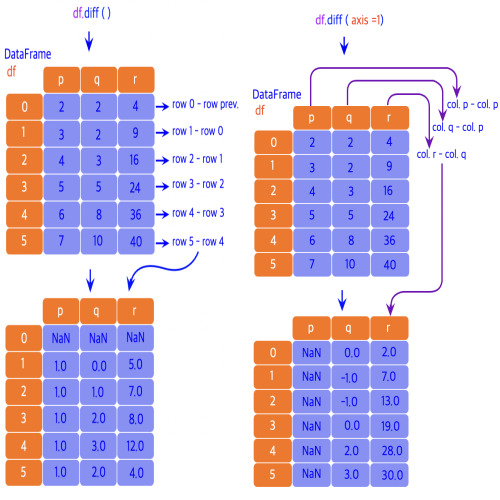